# Single predictor models
Single predictor models investigating the effect of a range of lower- and higher-level visual and auditory predictors.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tools.create import create_single_models
from tools.utils import dump_collection, load_collection
from tools.viz import (plot_regressor, plot_contrast,
                       plot_metrics, plot_contrast_by_dataset, plot_contrast_by_analysis,
                       plot_analysis_grid, plot_individual_analyses)
from pyns import Neuroscout
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path
%matplotlib inline

In [3]:
api = Neuroscout()

## Define predictors and confounds

In [4]:
predictors = ['speech', 'rms', 'text',
              'brightness', 'shot_change', 
              'any_faces', 
              'hand', 'action', 'landscape', 'building', 'indoors', 'city', 
              'animal', 'music', 'vehicle', 'water', 'wood', 'tool', 
              'people']

In [5]:
confounds = ['a_comp_cor_00', 'a_comp_cor_01', 'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05', 'trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z']

## Create models

In [6]:
#single_models = create_single_models(predictors, confounds)

In [7]:
filename = Path('models') / 'single_predictor.json'

In [8]:
# Note: shot change is not available for NNDb due to issues w/ Google API
single_models = load_collection(filename)

## Generate reports

In [14]:
# for (pred, dataset, task), model in flatten_collection(nnd_single_models):
#     model.generate_report(run_id=model.runs[0])

## Compile models

In [9]:
# for (pred, dataset, task), model in flatten_collection(single_models_narratives):
#     if model.get_status()['status'] == 'DRAFT':
#         model.private = False
#         model.push()
#         model.compile()
#     else:
#         print(f'{pred} {model.status} for {dataset}')

# Results

In [25]:
import scipy.stats as sps
from nilearn._utils.glm import z_score
from nilearn.image import threshold_img
from nilearn.glm import threshold_stats_img
from nilearn.plotting import plot_stat_map
from copy import deepcopy 

DOWNLOAD_DIR = Path('/media/hyperdrive/neuroscout-cli/neurovault_dl')

def t_to_z(t_map, dof):
    # Cobbled together from nilearn.glm
    old_shape = t_map.get_fdata().shape
    data = t_map.get_fdata().flatten()
    new_img = deepcopy(t_map)
    baseline = 0
    p_value = sps.t.sf(data, dof)
    
    one_minus_pvalues = sps.t.cdf(data, dof)
        
    # Avoid inf values kindly supplied by scipy.
    z_scores = z_score(p_value, one_minus_pvalue=one_minus_pvalues)
    
    z_scores = z_scores.reshape(old_shape)
    
    new_img.get_fdata()[:] = z_scores
    
    return new_img

3.2905267314918945
Budapest


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
LearningTemporalStructure


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
NaturalisticNeuroimagingDatabase


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
SherlockMerlin


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


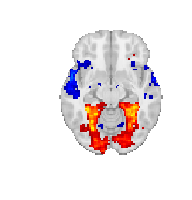

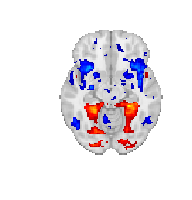

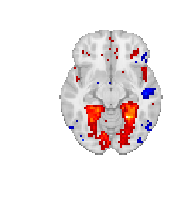

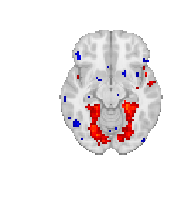

In [52]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-12], vmax=15, annotate=False)
contrast = 'building'
for an in single_models[contrast]:
    if an['task'] in ['SherlockMovie', 'movie', '500daysofsummer'] and an['dataset'] not in ['studyforrest']:
        t_map, metadata = an['analysis'].load_uploads(
                image_filters={'stat': 't', 'space': 'MNI152NLin2009cAsym'}, 
                download_dir=DOWNLOAD_DIR)[0]
        n_subjects = len(an['analysis'].model['Input']['Subject'])
        z_map = t_to_z(t_map, n_subjects-1)
        thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
        print(thresh)
        print(an['dataset'])
        plot_stat_map(thresh_z_map, threshold=thresh, **plot_args)

3.2905267314918945
Budapest


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
LearningTemporalStructure


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
NaturalisticNeuroimagingDatabase


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
SherlockMerlin


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


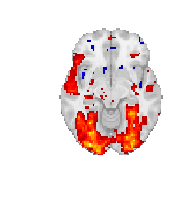

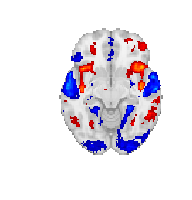

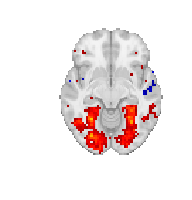

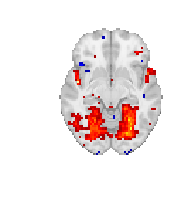

In [57]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[-10], vmax=15, annotate=False)
contrast = 'text'
for an in single_models[contrast]:
    if an['task'] in ['SherlockMovie', 'movie', '500daysofsummer'] and an['dataset'] not in ['studyforrest']:
        t_map, metadata = an['analysis'].load_uploads(
                image_filters={'stat': 't', 'space': 'MNI152NLin2009cAsym'}, 
                download_dir=DOWNLOAD_DIR)[0]
        n_subjects = len(an['analysis'].model['Input']['Subject'])
        z_map = t_to_z(t_map, n_subjects-1)
        thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
        print(thresh)
        print(an['dataset'])
        plot_stat_map(thresh_z_map, threshold=thresh, **plot_args)

3.2905267314918945
Budapest


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
LearningTemporalStructure


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
NaturalisticNeuroimagingDatabase


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


3.2905267314918945
SherlockMerlin


/home/alejandro/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


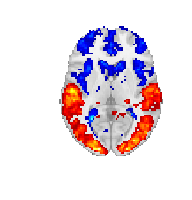

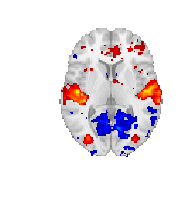

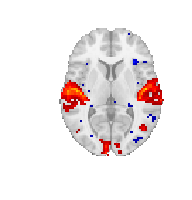

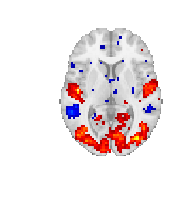

In [56]:
plot_args = dict(colorbar=False, display_mode='z', cut_coords=[6], vmax=15, annotate=False)
contrast = 'rms'
for an in single_models[contrast]:
    if an['task'] in ['SherlockMovie', 'movie', '500daysofsummer'] and an['dataset'] not in ['studyforrest']:
        t_map, metadata = an['analysis'].load_uploads(
                image_filters={'stat': 't', 'space': 'MNI152NLin2009cAsym'}, 
                download_dir=DOWNLOAD_DIR)[0]
        n_subjects = len(an['analysis'].model['Input']['Subject'])
        z_map = t_to_z(t_map, n_subjects-1)
        thresh_z_map, thresh = threshold_stats_img(z_map, alpha=0.001)
        print(thresh)
        print(an['dataset'])
        plot_stat_map(thresh_z_map, threshold=thresh, **plot_args)